In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil.parser
import datetime

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
df = pd.read_csv('OECD_waste_municipal.csv')

In [3]:
df.head(10)

,"﻿""LOCATION""",INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WASTEMUN,TOT,THND_TONNE,A,1980,10000.000,E
1,AUS,WASTEMUN,TOT,THND_TONNE,A,1992,12000.000,E
2,AUS,WASTEMUN,TOT,THND_TONNE,A,2000,13200.000,E
3,AUS,WASTEMUN,TOT,THND_TONNE,A,2009,14035.000,NaN
4,AUS,WASTEMUN,TOT,THND_TONNE,A,2011,14037.000,NaN
5,AUS,WASTEMUN,TOT,KG_CAP,A,1980,680.487,E
6,AUS,WASTEMUN,TOT,KG_CAP,A,1992,686.538,E
7,AUS,WASTEMUN,TOT,KG_CAP,A,2000,693.715,E
8,AUS,WASTEMUN,TOT,KG_CAP,A,2009,647.072,NaN
9,AUS,WASTEMUN,TOT,KG_CAP,A,2011,628.335,NaN


In [4]:
df_capita = df[df['MEASURE']=="KG_CAP"]

In [5]:
df_capita.columns = ('Country', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Amount', 'Flag Codes')

In [6]:
selection = df_capita[["Country", "TIME", "Amount"]]
selection

,Country,TIME,Amount
5,AUS,1980,680.487
6,AUS,1992,686.538
7,AUS,2000,693.715
8,AUS,2009,647.072
9,AUS,2011,628.335
36,AUT,1989,413.410
37,AUT,1990,417.305
38,AUT,1991,403.101
39,AUT,1992,405.066
40,AUT,1993,422.610


In [7]:
selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 5 to 1643
Data columns (total 3 columns):
Country    792 non-null object
TIME       792 non-null int64
Amount     792 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.8+ KB


In [8]:
dateutil.parser.parse("1980")

datetime.datetime(1980, 8, 18, 0, 0)

In [9]:
def convert_year(year_int):
    year_str = str(year_int)
    parsed_year = dateutil.parser.parse(year_str+'-01-01')
    return parsed_year

In [10]:
parsed_year = [convert_year(year) for year in selection["TIME"]]
selection['parsed_year'] = parsed_year

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
selection

,Country,TIME,Amount,parsed_year
5,AUS,1980,680.487,1980-01-01
6,AUS,1992,686.538,1992-01-01
7,AUS,2000,693.715,2000-01-01
8,AUS,2009,647.072,2009-01-01
9,AUS,2011,628.335,2011-01-01
36,AUT,1989,413.410,1989-01-01
37,AUT,1990,417.305,1990-01-01
38,AUT,1991,403.101,1991-01-01
39,AUT,1992,405.066,1992-01-01
40,AUT,1993,422.610,1993-01-01


In [12]:
selection.index = selection['parsed_year']

In [13]:
selection = selection.drop(['TIME', 'parsed_year'], axis=1)

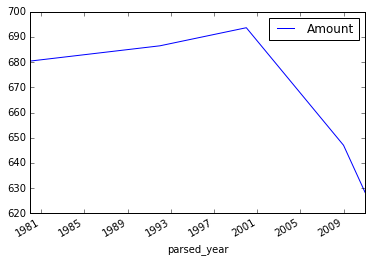

In [14]:
selection[selection["Country"] == "AUS"].plot()

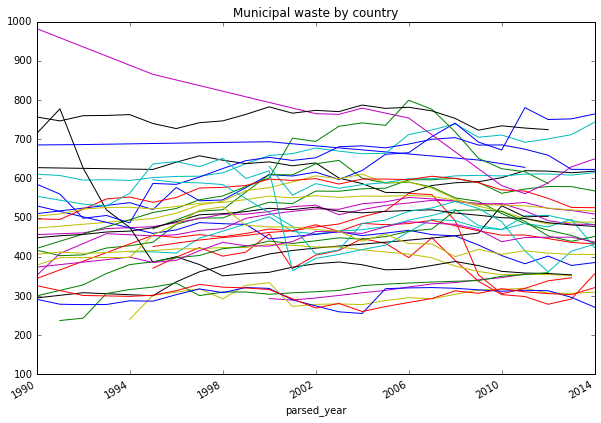

In [15]:
fig, ax = plt.subplots()

selection.groupby(by="Country").plot(ax = ax, legend = False, figsize = (10,7), xlim=("1990","2014"))

ax.set_title("Municipal waste by country")
# ax.set_xlabel("Year")
# ax.set_ylabel("kilogram per capita")


# y=selection["Amount"]
# z=selection.index
# n=selection["Country"]

# for i, txt in enumerate(n):
#     ax.annotate(txt, (z[i+5], y[i+5]))

# plt.savefig("municipalwaste-02.pdf", transparent = True)

# Packaging waste

In [16]:
pacwas = pd.read_csv('EU-packagingwaste.csv')

In [17]:
pacwas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22320 entries, 0 to 22319
Data columns (total 8 columns):
TIME                  22320 non-null int64
GEO                   22320 non-null object
WASTE                 22320 non-null object
STK_FLOW              22320 non-null object
WST_OPER              22320 non-null object
UNIT                  22320 non-null object
Value                 22320 non-null object
Flag and Footnotes    414 non-null object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [18]:
pacwas.head(10)

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes
0,2002,Austria,Packaging,Imports,Waste generated,Tonne,:,NaN
1,2002,Austria,Packaging,Imports,Waste generated,Kilograms per capita,:,NaN
2,2002,Austria,Packaging,Imports,Recycling,Tonne,:,NaN
3,2002,Austria,Packaging,Imports,Recycling,Kilograms per capita,:,NaN
4,2002,Austria,Packaging,Exports,Waste generated,Tonne,:,NaN
5,2002,Austria,Packaging,Exports,Waste generated,Kilograms per capita,:,NaN
6,2002,Austria,Packaging,Exports,Recycling,Tonne,:,NaN
7,2002,Austria,Packaging,Exports,Recycling,Kilograms per capita,:,NaN
8,2002,Austria,Packaging,Domestic,Waste generated,Tonne,"1,059,000",NaN
9,2002,Austria,Packaging,Domestic,Waste generated,Kilograms per capita,131.03,NaN


In [19]:
pacwas["WASTE"].value_counts()

Glass packaging                  4464
Metallic packaging               4464
Paper and cardboard packaging    4464
Packaging                        4464
Plastic packaging                4464
Name: WASTE, dtype: int64

In [20]:
# pacwas['Value'] == [float(value.replace(',', '')) for value in selection_r_p['Value']]

In [21]:
pacwas_recent = pacwas[(pacwas["TIME"]==2013)&(pacwas["STK_FLOW"]=="Domestic")&(pacwas["WASTE"]=="Packaging")]
pacwas_recent

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes
20468,2013,Austria,Packaging,Domestic,Waste generated,Tonne,"1,271,696",NaN
20469,2013,Austria,Packaging,Domestic,Waste generated,Kilograms per capita,149.98,NaN
20470,2013,Austria,Packaging,Domestic,Recycling,Tonne,"846,695",NaN
20471,2013,Austria,Packaging,Domestic,Recycling,Kilograms per capita,99.85,NaN
20528,2013,Belgium,Packaging,Domestic,Waste generated,Tonne,"1,738,288",NaN
20529,2013,Belgium,Packaging,Domestic,Waste generated,Kilograms per capita,155.44,NaN
20530,2013,Belgium,Packaging,Domestic,Recycling,Tonne,"1,368,110",NaN
20531,2013,Belgium,Packaging,Domestic,Recycling,Kilograms per capita,122.34,NaN
20588,2013,Bulgaria,Packaging,Domestic,Waste generated,Tonne,"350,043",NaN
20589,2013,Bulgaria,Packaging,Domestic,Waste generated,Kilograms per capita,48.18,NaN


In [22]:
pacwas_pc = pacwas_recent[pacwas_recent["UNIT"].str.contains(pat="Kilogram")]
pacwas_pc

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes
20469,2013,Austria,Packaging,Domestic,Waste generated,Kilograms per capita,149.98,NaN
20471,2013,Austria,Packaging,Domestic,Recycling,Kilograms per capita,99.85,NaN
20529,2013,Belgium,Packaging,Domestic,Waste generated,Kilograms per capita,155.44,NaN
20531,2013,Belgium,Packaging,Domestic,Recycling,Kilograms per capita,122.34,NaN
20589,2013,Bulgaria,Packaging,Domestic,Waste generated,Kilograms per capita,48.18,NaN
20591,2013,Bulgaria,Packaging,Domestic,Recycling,Kilograms per capita,31.67,NaN
20649,2013,Cyprus,Packaging,Domestic,Waste generated,Kilograms per capita,91.31,NaN
20651,2013,Cyprus,Packaging,Domestic,Recycling,Kilograms per capita,51.65,NaN
20709,2013,Czech Republic,Packaging,Domestic,Waste generated,Kilograms per capita,95.66,NaN
20711,2013,Czech Republic,Packaging,Domestic,Recycling,Kilograms per capita,66.9,NaN


In [23]:
pacwas_pc = pacwas_pc.drop("TIME",1)

In [24]:
pacwas_pc.columns

Index(['GEO', 'WASTE', 'STK_FLOW', 'WST_OPER', 'UNIT', 'Value',
       'Flag and Footnotes'],
      dtype='object')

In [25]:
pacwas_pc = pacwas_pc.drop('WASTE',1)

In [26]:
pacwas_pc = pacwas_pc.drop('STK_FLOW',1)
pacwas_pc = pacwas_pc.drop('UNIT',1)
pacwas_pc = pacwas_pc.drop('Flag and Footnotes',1)

In [27]:
pacwas_pc_generation = pacwas_pc[pacwas_pc["WST_OPER"]=="Waste generated"]

In [28]:
pacwas_pc_generation

,GEO,WST_OPER,Value
20469,Austria,Waste generated,149.98
20529,Belgium,Waste generated,155.44
20589,Bulgaria,Waste generated,48.18
20649,Cyprus,Waste generated,91.31
20709,Czech Republic,Waste generated,95.66
20769,Germany (until 1990 former territory of the FRG),Waste generated,210.42
20829,Denmark,Waste generated,169.62
20889,Estonia,Waste generated,169.9
20949,Greece,Waste generated,68.33
21009,Spain,Waste generated,143.63


In [29]:
pacwas_pc_generation = pacwas_pc_generation.drop("WST_OPER", 1)

In [30]:
pacwas_pc_generation.columns = ("GEO", "Generation")

In [31]:
pacwas_pc_generation

,GEO,Generation
20469,Austria,149.98
20529,Belgium,155.44
20589,Bulgaria,48.18
20649,Cyprus,91.31
20709,Czech Republic,95.66
20769,Germany (until 1990 former territory of the FRG),210.42
20829,Denmark,169.62
20889,Estonia,169.9
20949,Greece,68.33
21009,Spain,143.63


In [32]:
pacwas_pc_recycling = pacwas_pc[pacwas_pc["WST_OPER"]=="Recycling"]

In [33]:
pacwas_pc_recycling = pacwas_pc_recycling.drop("WST_OPER", 1)

In [34]:
pacwas_pc_recycling.columns = ("GEO", "Recycling")

In [35]:
# pacwas_pc_recycling
# pacwas_pc_recycling = pacwas_pc_recycling.drop(pacwas_pc_recycling.iloc[11],1)
pacwas_pc_recycling.index[11]

21131

In [36]:
pacwas_merge = pacwas_pc_generation.merge(pacwas_pc_recycling, left_on="GEO", right_on = "GEO")

In [37]:
pacwas_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
GEO           31 non-null object
Generation    31 non-null object
Recycling     31 non-null object
dtypes: object(3)
memory usage: 992.0+ bytes


In [38]:
def float_conversion(value_str):
    try:
        value = float(value_str)
        return value
    except:
        pass

In [39]:
pacwas_merge["Generation"] = pacwas_merge["Generation"].apply(float_conversion)

In [40]:
pacwas_merge["Recycling"] = pacwas_merge["Recycling"].apply(float_conversion)

In [41]:
pacwas_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
GEO           31 non-null object
Generation    29 non-null float64
Recycling     29 non-null float64
dtypes: float64(2), object(1)
memory usage: 992.0+ bytes


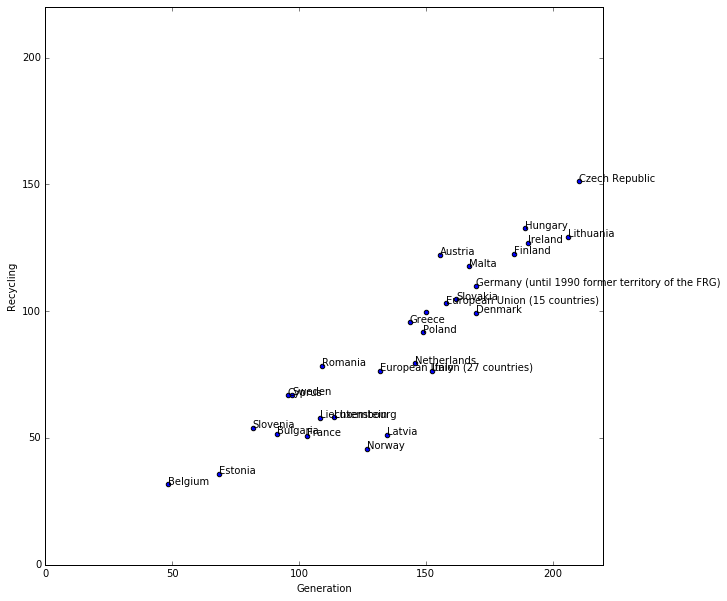

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
pacwas_merge.plot(ax = ax, kind='scatter', x="Generation", y="Recycling", xlim=(0,220), ylim=(0,220))

y=pacwas_merge["Recycling"]
z=pacwas_merge["Generation"]
n=pacwas_merge["GEO"]

#i+2, because index number starts at 2 
for i, txt in enumerate(n):
    try:
        ax.annotate(txt, (z[i+1], y[i+1]))
    except:
        pass

In [43]:
# iqr = pacwas_merge.quantile(q=0.75) - pacwas_merge.quantile(q=0.25) 

# Plastic waste packaing recycling

In [44]:
pacwas["WASTE"].value_counts()

Glass packaging                  4464
Metallic packaging               4464
Paper and cardboard packaging    4464
Packaging                        4464
Plastic packaging                4464
Name: WASTE, dtype: int64

In [45]:
plastic = pacwas[(pacwas["WASTE"]=="Plastic packaging")&(pacwas["TIME"]==2013)&(pacwas["STK_FLOW"]=="Domestic")]

In [46]:
plastic_pc = plastic[plastic["UNIT"].str.contains(pat="Kilogram")]

In [47]:
plastic_pc

,TIME,GEO,WASTE,STK_FLOW,WST_OPER,UNIT,Value,Flag and Footnotes
20493,2013,Austria,Plastic packaging,Domestic,Waste generated,Kilograms per capita,34.05,NaN
20495,2013,Austria,Plastic packaging,Domestic,Recycling,Kilograms per capita,11.71,NaN
20553,2013,Belgium,Plastic packaging,Domestic,Waste generated,Kilograms per capita,29.45,NaN
20555,2013,Belgium,Plastic packaging,Domestic,Recycling,Kilograms per capita,11.47,NaN
20613,2013,Bulgaria,Plastic packaging,Domestic,Waste generated,Kilograms per capita,13.29,NaN
20615,2013,Bulgaria,Plastic packaging,Domestic,Recycling,Kilograms per capita,5.49,NaN
20673,2013,Cyprus,Plastic packaging,Domestic,Waste generated,Kilograms per capita,18.25,NaN
20675,2013,Cyprus,Plastic packaging,Domestic,Recycling,Kilograms per capita,8.27,NaN
20733,2013,Czech Republic,Plastic packaging,Domestic,Waste generated,Kilograms per capita,20.46,NaN
20735,2013,Czech Republic,Plastic packaging,Domestic,Recycling,Kilograms per capita,12.2,NaN


In [48]:
plastic_pc_recycling = plastic_pc[plastic_pc["WST_OPER"]=="Recycling"]
plastic_pc_generation = plastic_pc[plastic_pc["WST_OPER"]=="Waste generated"]

In [49]:
plastic_pc_recy = plastic_pc_recycling[["GEO", "Value"]]
plastic_pc_gen = plastic_pc_generation[["GEO", "Value"]]

In [50]:
plastic_pc_recy.columns = ("GEO", "plastic_recycling")
plastic_pc_gen.columns = ("GEO", "plastic_generation")

In [51]:
plastic_merge = plastic_pc_recy.merge(plastic_pc_gen, left_on="GEO", right_on="GEO")

In [52]:
plastic_merge['plastic_generation'] = plastic_merge['plastic_generation'].apply(float_conversion)
plastic_merge['plastic_recycling'] = plastic_merge['plastic_recycling'].apply(float_conversion)

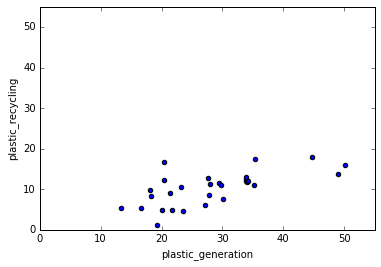

In [53]:
plastic_merge.plot(kind="scatter", x="plastic_generation", y="plastic_recycling", xlim=(0,55), ylim=(0,55))

# Writing a function for this mess

In [54]:
def waste_type_analysis(waste_type, descriptor):
    waste_type = pacwas[(pacwas["WASTE"]==descriptor)&(pacwas["TIME"]==2013)&(pacwas["STK_FLOW"]=="Domestic")]
    pc = waste_type[waste_type["UNIT"].str.contains(pat="Kilogram")]
    recycling = pc[pc["WST_OPER"]=="Recycling"]
    generation = pc[pc["WST_OPER"]=="Waste generated"]
    pc_recy = recycling[["GEO", "Value"]]
    pc_gen = generation[["GEO", "Value"]]
    pc_recy.columns = ("GEO", "_recycling")
    pc_gen.columns = ("GEO", "_generation")
    merge = pc_recy.merge(pc_gen, left_on="GEO", right_on="GEO")
    merge['_generation'] = merge['_generation'].apply(float_conversion)
    merge['_recycling'] = merge['_recycling'].apply(float_conversion)
#     merge.plot(kind="scatter", figsize=(7,7), x="_generation", y="_recycling", xlim=(0, int(merge["_generation"].max() + 5)), ylim=(0, int(merge["_generation"].max() + 5)))
    merge.plot(kind="scatter", figsize=(7,7), x="_generation", y="_recycling", xlim=(0, 100), ylim=(0, 100))

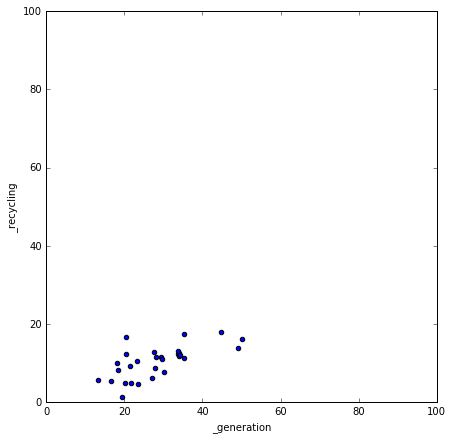

In [55]:
waste_type_analysis("plastic", "Plastic packaging")
plt.savefig('plastic.pdf', transparent = True)

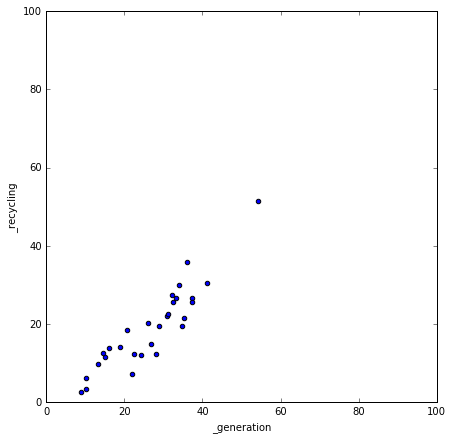

In [56]:
waste_type_analysis("glass", "Glass packaging")
plt.savefig('glass.pdf', transparent = True)

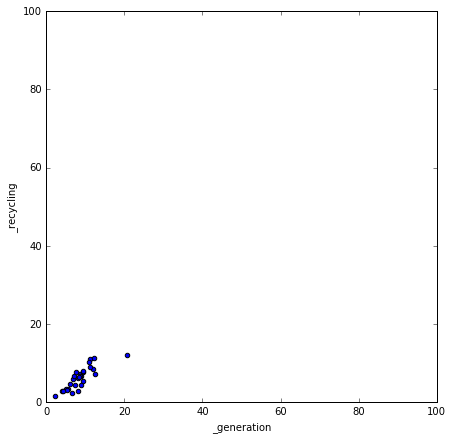

In [57]:
waste_type_analysis("Metal", "Metallic packaging")
plt.savefig('metal.pdf', transparent = True)

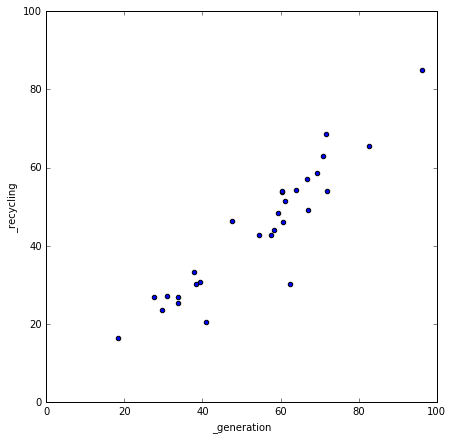

In [58]:
waste_type_analysis("Paper", "Paper and cardboard packaging")
plt.savefig('paper.pdf', transparent = True)

# Hazardous waste

In [59]:
df_haz = pd.read_csv('EU-hazardous-waste.csv')

In [82]:
df_haz.head(6)

,WASTE,GEO,UNIT,HAZARD,NACE_R2,TIME,Value,Flag and Footnotes
0,Total Waste,Belgium,Tonne,Hazardous,All NACE activities plus households,2012,"4,257,755",NaN
1,Total Waste,Belgium,Kilograms per capita,Hazardous,All NACE activities plus households,2012,383,NaN
2,Total Waste,Bulgaria,Tonne,Hazardous,All NACE activities plus households,2012,"13,407,042",NaN
3,Total Waste,Bulgaria,Kilograms per capita,Hazardous,All NACE activities plus households,2012,"1,835",NaN
4,Total Waste,Czech Republic,Tonne,Hazardous,All NACE activities plus households,2012,"1,481,281",NaN
5,Total Waste,Czech Republic,Kilograms per capita,Hazardous,All NACE activities plus households,2012,141,NaN


In [84]:
haz = df_haz[(df_haz["UNIT"]=="Tonne")&(df_haz["WASTE"]=="Total Waste")]
selection_haz = haz[["GEO", "Value"]]
selection_haz

,GEO,Value
0,Belgium,"4,257,755"
2,Bulgaria,"13,407,042"
4,Czech Republic,"1,481,281"
6,Denmark,"1,192,750"
8,Germany (until 1990 former territory of the FRG),"21,983,895"
10,Estonia,"9,159,139"
12,Ireland,"1,385,065"
14,Greece,"297,370"
16,Spain,"3,113,947"
18,France,"11,303,137"


In [86]:
selection_haz['Values'] = [value.replace(',', '') for value in selection_haz['Value']]

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [87]:
selection_haz['amount_tonnes'] = selection_haz['Values'].apply(float_conversion)

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [88]:
selection_haz = selection_haz.drop('Value', 1)
selection_haz = selection_haz.drop('Values', 1)

In [89]:
selection_haz.to_csv('hazardous_waste_selection.csv')

In [103]:
selection_haz.sort_values(by='amount_tonnes', ascending=False)

,GEO,amount_tonnes
8,Germany (until 1990 former territory of the FRG),21983895.0
66,Serbia,14457180.0
2,Bulgaria,13407042.0
18,France,11303137.0
22,Italy,9474446.0
10,Estonia,9159139.0
54,United Kingdom,7630711.0
36,Netherlands,4859942.0
0,Belgium,4257755.0
68,Turkey,3988200.0


In [91]:
df_haz["WASTE"].value_counts()

Total Waste                                 74
Chemical and medical wastes (subtotal)      74
Mineral and solidified wastes (subtotal)    74
Name: WASTE, dtype: int64

In [92]:
haz_chem = df_haz[(df_haz["UNIT"]=="Tonne")&(df_haz["WASTE"]=="Chemical and medical wastes (subtotal)")]
selection_haz_chem = haz_chem[["GEO", "Value"]]
selection_haz_chem

,GEO,Value
74,Belgium,"2,351,545"
76,Bulgaria,"52,150"
78,Czech Republic,"631,647"
80,Denmark,"205,232"
82,Germany (until 1990 former territory of the FRG),"6,386,831"
84,Estonia,"1,560,521"
86,Ireland,"1,241,262"
88,Greece,"122,464"
90,Spain,"1,823,898"
92,France,"3,610,656"


In [93]:
haz_min = df_haz[(df_haz["UNIT"]=="Tonne")&(df_haz["WASTE"]=="Mineral and solidified wastes (subtotal)")]
selection_haz_min = haz_min[["GEO", "Value"]]
selection_haz_min

,GEO,Value
148,Belgium,"1,331,214"
150,Bulgaria,"13,343,813"
152,Czech Republic,"793,459"
154,Denmark,"789,854"
156,Germany (until 1990 former territory of the FRG),"10,973,308"
158,Estonia,"7,569,320"
160,Ireland,"35,359"
162,Greece,"46,937"
164,Spain,"688,495"
166,France,"4,947,028"


In [94]:
selection_haz_chem['Value'] = [value.replace(',', '') for value in selection_haz_chem['Value']]
selection_haz_min['Value'] = [value.replace(',', '') for value in selection_haz_min['Value']]

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [96]:
selection_haz_chem['amount_tonnes'] = selection_haz_chem['Value'].apply(float_conversion)
selection_haz_min['amount_tonnes'] = selection_haz_min['Value'].apply(float_conversion)

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [99]:
selection_haz_chem = selection_haz_chem.drop('Value', 1)
selection_haz_min = selection_haz_min.drop('Value', 1)

In [100]:
selection_haz_chem.to_csv('hazardous_waste_chem_selection.csv')
selection_haz_min.to_csv('hazardous_waste_min_selection.csv')